# Compare raw functional connectivity matrix

## 0. Import packages

In [31]:
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import plotting
from nilearn import datasets

## 1. Load data

In [32]:
# load all data
# subject 50059 has some problem with the data, so delete this subject entirely
task_list = ['bart','bht','scap','stopsignal']
X_all = empty_array = np.empty((0, 16384))
y_all = empty_array = np.empty((0,1))
for i in os.listdir('processed_data'):
    if i.startswith("sub") & ~i.endswith('50059.csv'):
        sub_data = pd.read_csv('processed_data/'+i, index_col=[0])
        for task in task_list:
            try:
                this_x = sub_data[sub_data['task'] == task]
                X_all = np.vstack((X_all, np.asarray(this_x.correlation).reshape((1,16384)))) 
                y_all = np.vstack((y_all,task))
            except:
                print(i + ': ' + task) 
            
print(X_all.shape)
print(y_all.shape)

(648, 16384)
(648, 1)


## 2. Calculate and reorganize Functional connectivity matrix

In [34]:
# check difumo labels
# create a new reorder based on the network labels
dim = 128
res = 2
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=res, legacy_format=False
)
label_difumo =difumo.labels
label_difumo.loc[label_difumo['yeo_networks7'] == 'No network found', 'yeo_networks7'] = 'Zero'
sorted_difumo_yeo7 = label_difumo.sort_values(by=['yeo_networks7','yeo_networks17','difumo_names'])
sorted_indices = label_difumo.sort_values(by=['yeo_networks7','yeo_networks17','difumo_names']).index


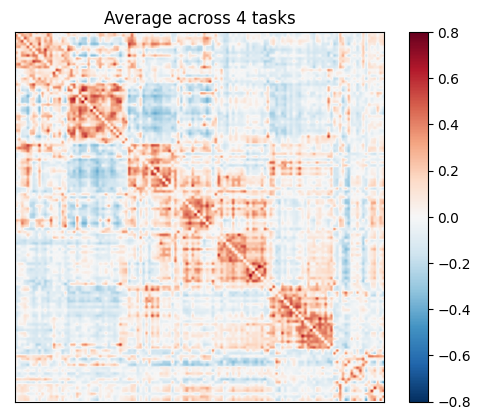

In [40]:
# calculate the grand average
FC_avg = X_all.mean(axis = 0).reshape(128,128)
np.fill_diagonal(FC_avg, 0)
# reorder with difumo labels
FC_avg_reorder = FC_avg[sorted_indices][:, sorted_indices]
# Visualize the reordered matrix
ax = plt.subplot()
plt.imshow(FC_avg_reorder, cmap='RdBu_r', origin='upper', vmin=-0.8 , vmax=0.8)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Average across 4 tasks')
plt.colorbar()
# better than the hierarchical clustering!

Task: BART, vmin: -0.4263373902592592, vmax: 0.7466667890740739
Task: Breath holding, vmin: -0.4784083164999995, vmax: 0.7090104654320988
Task: Spatial memory, vmin: -0.4741871776271606, vmax: 0.7576569400617286
Task: Stop signal, vmin: -0.43799150373641993, vmax: 0.6922415483333334


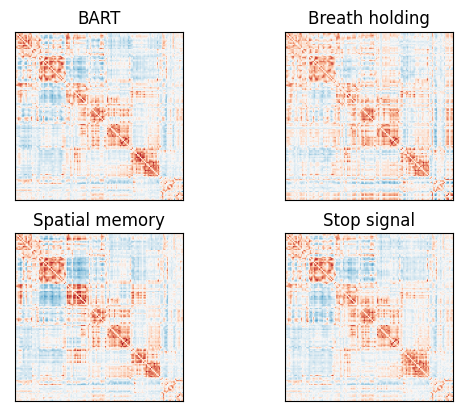

In [37]:
# compare 4 tasks
FC_task_avg = []
FC_task_avg_reorder = []
task_name = ['BART','Breath holding','Spatial memory','Stop signal']
for t,task in enumerate(task_list):
    task_idx = np.where(y_all == task)[0]
    FC_this_task = X_all[task_idx,:]
    FC_this_task_avg = FC_this_task.mean(axis = 0).reshape(128,128)
    FC_task_avg.append(FC_this_task_avg)
    
    # plot the reordered 
    np.fill_diagonal(FC_this_task_avg, 0)
    FC_task_reorder = FC_this_task_avg[sorted_indices][:, sorted_indices]
    FC_task_avg_reorder.append(FC_task_reorder)
    ax = plt.subplot(2, 2, t+1)
    plt.imshow(FC_task_reorder,cmap = 'RdBu_r', vmin=-0.8, vmax=0.8)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(task_name[t])
    print(f"Task: {task_name[t]}, vmin: {np.min(FC_this_task_avg)}, vmax: {np.max(FC_this_task_avg)}")


Task: BART, vmin: -0.14298012945350308, vmax: 0.15797099931952172
Task: Breath holding, vmin: -0.26699031559135816, vmax: 0.27554631334112645
Task: Spatial memory, vmin: -0.22827979797694592, vmax: 0.2294023261083331
Task: Stop signal, vmin: -0.1812219294467592, vmax: 0.15566610247145113


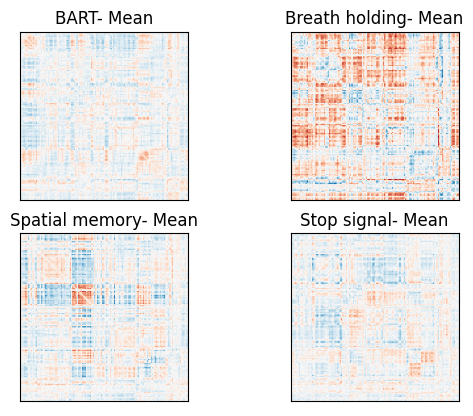

In [45]:
# plot how each task differs from the average
FC_task_diff = []
task_name = ['BART','Breath holding','Spatial memory','Stop signal']
for t,task in enumerate(task_list):
    FC_this_task_avg = FC_task_avg_reorder[t]
    FC_diff = FC_this_task_avg - FC_avg_reorder
    
    # plot the reordered 
    ax = plt.subplot(2, 2, t+1)
    plt.imshow(FC_diff,cmap = 'RdBu_r', vmin=-0.3, vmax=0.3)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(task_name[t] + "- Mean")
    print(f"Task: {task_name[t]}, vmin: {np.min(FC_diff)}, vmax: {np.max(FC_diff)}")

## 3. Compare witht the network

ContA: 18
18
DefaultB: 21
39
DorsAttnB: 18
57
SalVentAttnA: 13
70
SomMotA: 17
87
VisCent: 23
110
Zero: 18
128


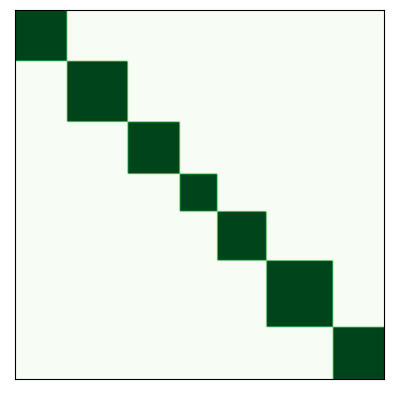

In [44]:
# visualize the yeo 7 networks
yeo_7networks = set(sorted_difumo_yeo7.yeo_networks7)
#np.diag((matrix1, matrix2))
matrix0 = np.zeros((1,1))
from collections import Counter

# Example list
my_list = sorted_difumo_yeo7.yeo_networks7
# Count the occurrences of each element in the list
element_counts = Counter(my_list)
# Print the element counts
yeo_network = np.zeros((128,128))
count_pre = 0
for element, count in element_counts.items():
    print(f"{element}: {count}")
    count_total = count_pre + count
    print(count_total)
    yeo_network[count_pre:count_total,count_pre:count_total] = np.ones((count,count))
    count_pre = count_total

ax = plt.subplot()
plt.imshow(yeo_network,cmap='Greens')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)